In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import re

In [ ]:
def load_data():
  data = pd.read_excel('/content/PEMILU2024.xlsx')

  return data

In [ ]:
tweet_df = load_data()

In [ ]:
tweet_df.head()

,Date,Sentimen,Username,Kategori
0,Sun Aug 20 23:58:34 +0000 2023,"Komisi Pemilihan Umum, Sabtu (19/8/2023), memp...",hariankompas,netral
1,Sun Aug 20 23:57:12 +0000 2023,"Targetkan Enam Kursi di Pemilu 2024, Ketua DPC...",metrojambi,netral
2,Sun Aug 20 23:56:45 +0000 2023,Presiden 2024 hanya Ganjar PranowoTerbaik !! y...,ganjarist_satu,positif
3,Sun Aug 20 23:56:08 +0000 2023,"kontestasi berharap cawapres"" versus ""kandidat...",irwan_dwi_a,netral
4,Sun Aug 20 23:55:29 +0000 2023,"*Minggu Kasih Kapolres Tabanan, Ajak Jemaat Su...",HKerambitan,netral


In [ ]:
df = pd.DataFrame(tweet_df[['Kategori','Sentimen']])

In [ ]:
df.shape

(3471, 2)

In [ ]:
df['Kategori'].value_counts()

,count
Kategori,
netral,1657
positif,1254
negatif,560


Text(0.5, 1.0, 'Dataset Asli dan Labeling')

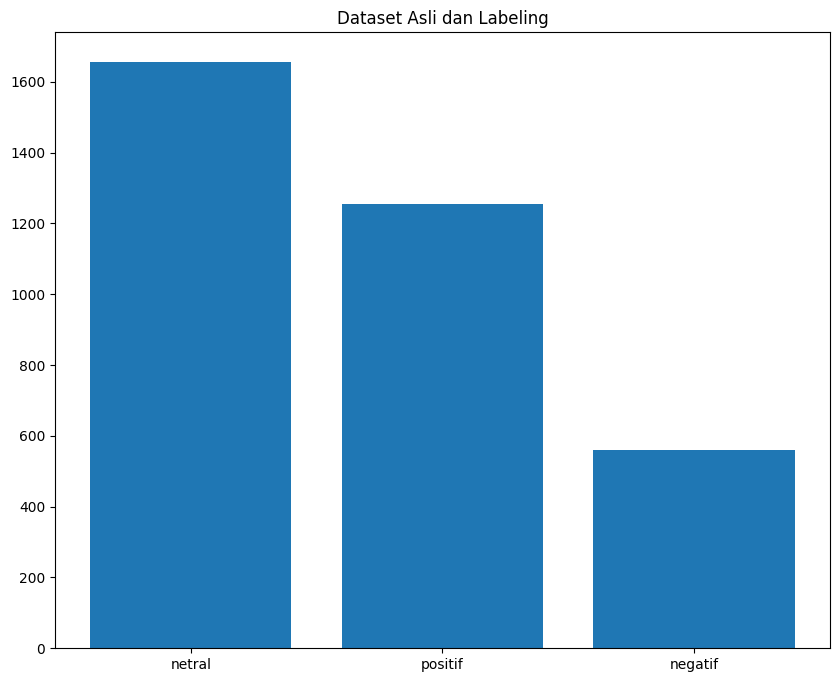

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
ktgr_cnt = Counter(df['Kategori'])
plt.figure(figsize=(10,8))
plt.bar(ktgr_cnt.keys(), ktgr_cnt.values())
plt.title("Dataset Asli dan Labeling")

In [ ]:
df['lower'] = df['Sentimen'].str.lower()
df.head()

,Kategori,Sentimen,lower
0,netral,"Komisi Pemilihan Umum, Sabtu (19/8/2023), memp...","komisi pemilihan umum, sabtu (19/8/2023), memp..."
1,netral,"Targetkan Enam Kursi di Pemilu 2024, Ketua DPC...","targetkan enam kursi di pemilu 2024, ketua dpc..."
2,positif,Presiden 2024 hanya Ganjar PranowoTerbaik !! y...,presiden 2024 hanya ganjar pranowoterbaik !! y...
3,netral,"kontestasi berharap cawapres"" versus ""kandidat...","kontestasi berharap cawapres"" versus ""kandidat..."
4,netral,"*Minggu Kasih Kapolres Tabanan, Ajak Jemaat Su...","*minggu kasih kapolres tabanan, ajak jemaat su..."


In [ ]:
import re # impor modul regular expression

def hapus_angka(tweet):
  tweet = re.sub(r"\d+", "", tweet)
  # remove old style retweet text "RT"
  tweet = re.sub(r'^RT[\s]+', '', tweet)
  # remove hyperlinks
  tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
  # remove hashtags
  # only removing the hash # sign from the word
  tweet = re.sub(r'#+', '', tweet)
  #remove coma
  tweet = re.sub(r',','',tweet)
  #remove angka
  tweet = re.sub('[0-9]+', '', tweet)
  #Aphabets only, exlude numbers and special characters
  tweet = re.sub(r'[^a-zA-Z]+', ' ', tweet)

  return tweet

In [ ]:
df['h_angka']=df['lower'].apply(lambda x: hapus_angka(x))

In [ ]:
df.head()

,Kategori,Sentimen,lower,h_angka
0,netral,"Komisi Pemilihan Umum, Sabtu (19/8/2023), memp...","komisi pemilihan umum, sabtu (19/8/2023), memp...",komisi pemilihan umum sabtu memperbarui daftar...
1,netral,"Targetkan Enam Kursi di Pemilu 2024, Ketua DPC...","targetkan enam kursi di pemilu 2024, ketua dpc...",targetkan enam kursi di pemilu ketua dpc pdip ...
2,positif,Presiden 2024 hanya Ganjar PranowoTerbaik !! y...,presiden 2024 hanya ganjar pranowoterbaik !! y...,presiden hanya ganjar pranowoterbaik yang lain...
3,netral,"kontestasi berharap cawapres"" versus ""kandidat...","kontestasi berharap cawapres"" versus ""kandidat...",kontestasi berharap cawapres versus kandidat c...
4,netral,"*Minggu Kasih Kapolres Tabanan, Ajak Jemaat Su...","*minggu kasih kapolres tabanan, ajak jemaat su...",minggu kasih kapolres tabanan ajak jemaat suk...


In [ ]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.7 MB/s eta 0:00:00


In [ ]:
#tokenize
from nltk.tokenize import TweetTokenizer

#import stopword
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_indonesia = stopwords.words('indonesian')

#import sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer = factory.create_stemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
emoticons_phone = set(['🤣','😁','😂','🖖','😘','❤️','😄','😔','☺️','👍','😊','😍','😭','💋','😒','😳','😜','🙈','😡',
                       '😱','😝','😢','😃','😉','😏','😞','😅','😚','🙊','😌','😀','😋','😆','😕','👌','😀','😃',
                       '😄','😁','😆','😅','😂','🤣','☺️','😊','😇','🙂','🙃','😉','😌','😍','🥰','😘','😗','😙','😚',
                       '😋','😛','😝','😜','🤪','🤨','🧐','🤓','😎','🤩','🥳','😏','😒','😞','😔','😟','😕','🙁',
                       '☹️','😣','😖','😫','😩','🥺','😢','😭','😤','😠','😡','🤬','🤯','😳','🥵','🥶','😱','😨',
                       '😰','😥','😓','🤗','🤔','🤭🤫','🤥😶','😐','😑','😬','🙄','😯','😦','😧','😮','😲','🥱','😴',
                       '🤤','😪','😵','🤐','🥴','🤢','🤮','🤧','😷','🤒','🤕','🤑','🤠😈','👿','👹','👺','🤡','💩',
                       '👻','💀','☠️','👽','👾','🤖','🎃','😺','😸','😻','😹','😼','😽','🙀','😿','😾','🤲','👍','🤝',
                       '👎','🤜','🤛','🤞','✌️','🤟','🤘','👌','🤏','👈','👉','👆','👇','☝️','✋','🤚','🖐','🖖','👋','🤙',
                       '💪','🦾','👇','🖕','🙏','🦶','🦵','🦿','💄','💋','👄','🦷','👅','👃','🦻','👣','👁','👀','🧠',
                       '🗣👤','👥','👶','👧','🧒','👦','👩','🧑','👨','👩‍🦱','🧑‍🦱','👨‍🦱👩‍🦰','🧑‍🦰👨‍🦰','👱‍♀️','👱','👱‍♂️','👩‍🦳','🧑‍🦳',
                       '👨‍🦳','👩‍🦲','🧑‍🦲','👨‍🦲','🧔','👵','🧓','👴','👲','👳‍♀️','👳','👳‍♂️','🧕','👮‍♀️','👲','👮‍♂️','👷‍♀️','👷','👷‍♂️',
                       '💂‍♀️','💂','💂‍♂️','🕵️‍♀️','🕵️','🕵️‍♂️','👩‍⚕️','🧑‍⚕️','👨‍⚕️','👩‍🌾','🐒','🙊','🐵','🙈','🙉','🐷','🐻','🐶','🐱',
                       '🦊','🚗','🚕','🚙','🚌','🚎','🏎','🚛','🚚','🚐','🚒','🚑','🚓','🏢','🏠','🏡','🏬','🏘','🏣',
                       '🏚','🏤','🏗','🏥','⛺️','🏦','🏛','💒','🏩','🏫','🏪','🏨','⛪️','🕌','🕍','🛕','🕋','⛩','📈',
                       '📉','🗒','🗓'])
# sad happy
emoticons_sad_happy= set(['◉‿◉','o ^ - ^ o','^_^',':)',':^)',
                     ': NS)','8)',':HAI','@',':HAI)',':‑)',
                     ':P',':@','8‑D',':‑)',':-&','=D',':‑p',
                     '=‑D','XD',':D',':-))','%-)',':}',
                     ':c)',':^)',':C','>:3',':>','L',':-/','>:/',
                     ':S','>:[','@',':-(','"["',':-<',
                     '=\\','=/','>:(',':',':{','>:\\',
                     '(',':','(", ")',':','("',':-c',
                     '> :(',':‑',':NS('])
# all emot happy + sad
emoticons = emoticons_phone.union(emoticons_sad_happy)


def fulltext(tweet):
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    #remove coma
    tweet = re.sub(r',','',tweet)
    #remove angka
    tweet = re.sub('[0-9]+', '', tweet)

    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False,
    strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)


    return tweet_tokens

df['tokenizing']=df['h_angka'].apply(lambda x: fulltext(x))

In [ ]:
df.head()

,Kategori,Sentimen,lower,h_angka,tokenizing
0,netral,"Komisi Pemilihan Umum, Sabtu (19/8/2023), memp...","komisi pemilihan umum, sabtu (19/8/2023), memp...",komisi pemilihan umum sabtu memperbarui daftar...,"[komisi, pemilihan, umum, sabtu, memperbarui, ..."
1,netral,"Targetkan Enam Kursi di Pemilu 2024, Ketua DPC...","targetkan enam kursi di pemilu 2024, ketua dpc...",targetkan enam kursi di pemilu ketua dpc pdip ...,"[targetkan, enam, kursi, di, pemilu, ketua, dp..."
2,positif,Presiden 2024 hanya Ganjar PranowoTerbaik !! y...,presiden 2024 hanya ganjar pranowoterbaik !! y...,presiden hanya ganjar pranowoterbaik yang lain...,"[presiden, hanya, ganjar, pranowoterbaik, yang..."
3,netral,"kontestasi berharap cawapres"" versus ""kandidat...","kontestasi berharap cawapres"" versus ""kandidat...",kontestasi berharap cawapres versus kandidat c...,"[kontestasi, berharap, cawapres, versus, kandi..."
4,netral,"*Minggu Kasih Kapolres Tabanan, Ajak Jemaat Su...","*minggu kasih kapolres tabanan, ajak jemaat su...",minggu kasih kapolres tabanan ajak jemaat suk...,"[minggu, kasih, kapolres, tabanan, ajak, jemaa..."


In [ ]:
# Filtering

sw = []
def stopwords(text):
    '''a function for removing the stopword'''
    import re
    # text = [word.lower() for word in text.split() ]
    for word in text:
        for stop in sw:
            if word==stop:
                text.remove(word)
    text = " ".join(text)
    text = re.sub(r'(.+?)\1+', r'\1',text)
    return text
df['filtering'] = df['tokenizing'].apply(stopwords)
df['filtering']

,filtering
0,komisi pemilihan um sabtu memperbarui daftar c...
1,targetkan enam kursi di pemilu ketua dpc pdip ...
2,presiden hanya ganjar pranowoterbaik yang lain...
3,kontestasi berharap cawapres versus kandidat c...
4,mingu kasih kapolres taban ajak jemat sukseska...
...,...
3466,kata mbak najwashihab ini masih berlaku untuk ...
3467,mendagri muhamad tito karnavian meminta agar p...
3468,pesan damai jepang pemilu habibluthfibinyahya ...
3469,sebagai warga nu saluran politik saya sejak ik...


In [ ]:
df.head()

,Kategori,Sentimen,lower,h_angka,tokenizing,filtering
0,netral,"Komisi Pemilihan Umum, Sabtu (19/8/2023), memp...","komisi pemilihan umum, sabtu (19/8/2023), memp...",komisi pemilihan umum sabtu memperbarui daftar...,"[komisi, pemilihan, umum, sabtu, memperbarui, ...",komisi pemilihan um sabtu memperbarui daftar c...
1,netral,"Targetkan Enam Kursi di Pemilu 2024, Ketua DPC...","targetkan enam kursi di pemilu 2024, ketua dpc...",targetkan enam kursi di pemilu ketua dpc pdip ...,"[targetkan, enam, kursi, di, pemilu, ketua, dp...",targetkan enam kursi di pemilu ketua dpc pdip ...
2,positif,Presiden 2024 hanya Ganjar PranowoTerbaik !! y...,presiden 2024 hanya ganjar pranowoterbaik !! y...,presiden hanya ganjar pranowoterbaik yang lain...,"[presiden, hanya, ganjar, pranowoterbaik, yang...",presiden hanya ganjar pranowoterbaik yang lain...
3,netral,"kontestasi berharap cawapres"" versus ""kandidat...","kontestasi berharap cawapres"" versus ""kandidat...",kontestasi berharap cawapres versus kandidat c...,"[kontestasi, berharap, cawapres, versus, kandi...",kontestasi berharap cawapres versus kandidat c...
4,netral,"*Minggu Kasih Kapolres Tabanan, Ajak Jemaat Su...","*minggu kasih kapolres tabanan, ajak jemaat su...",minggu kasih kapolres tabanan ajak jemaat suk...,"[minggu, kasih, kapolres, tabanan, ajak, jemaa...",mingu kasih kapolres taban ajak jemat sukseska...


In [ ]:
#  Stemming
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()
def stemming(text):
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)
df['tweet_clean'] = df['filtering'].apply(stemming)
df['tweet_clean']

,tweet_clean
0,komisi pilih um sabtu baru daftar calon sement...
1,target enam kursi di milu ketua dpc pdip sarol...
2,presiden hanya ganjar pranowoterbaik yang lai ...
3,kontestasi harap cawapres versus kandidat cawa...
4,mingu kasih kapolres taban ajak jemat sukses m...
...,...
3466,kata mbak najwashihab ini masih laku untuk milu
3467,mendagri muhamad tito karnavian minta agar mil...
3468,pesan damai jepang milu habibluthfibinyahya he...
3469,bagai warga nu salur politik saya sejak ikut m...


In [ ]:
df.head()

,Kategori,Sentimen,lower,h_angka,tokenizing,filtering,tweet_clean
0,netral,"Komisi Pemilihan Umum, Sabtu (19/8/2023), memp...","komisi pemilihan umum, sabtu (19/8/2023), memp...",komisi pemilihan umum sabtu memperbarui daftar...,"[komisi, pemilihan, umum, sabtu, memperbarui, ...",komisi pemilihan um sabtu memperbarui daftar c...,komisi pilih um sabtu baru daftar calon sement...
1,netral,"Targetkan Enam Kursi di Pemilu 2024, Ketua DPC...","targetkan enam kursi di pemilu 2024, ketua dpc...",targetkan enam kursi di pemilu ketua dpc pdip ...,"[targetkan, enam, kursi, di, pemilu, ketua, dp...",targetkan enam kursi di pemilu ketua dpc pdip ...,target enam kursi di milu ketua dpc pdip sarol...
2,positif,Presiden 2024 hanya Ganjar PranowoTerbaik !! y...,presiden 2024 hanya ganjar pranowoterbaik !! y...,presiden hanya ganjar pranowoterbaik yang lain...,"[presiden, hanya, ganjar, pranowoterbaik, yang...",presiden hanya ganjar pranowoterbaik yang lain...,presiden hanya ganjar pranowoterbaik yang lai ...
3,netral,"kontestasi berharap cawapres"" versus ""kandidat...","kontestasi berharap cawapres"" versus ""kandidat...",kontestasi berharap cawapres versus kandidat c...,"[kontestasi, berharap, cawapres, versus, kandi...",kontestasi berharap cawapres versus kandidat c...,kontestasi harap cawapres versus kandidat cawa...
4,netral,"*Minggu Kasih Kapolres Tabanan, Ajak Jemaat Su...","*minggu kasih kapolres tabanan, ajak jemaat su...",minggu kasih kapolres tabanan ajak jemaat suk...,"[minggu, kasih, kapolres, tabanan, ajak, jemaa...",mingu kasih kapolres taban ajak jemat sukseska...,mingu kasih kapolres taban ajak jemat sukses m...


In [ ]:
df.to_excel('dataclean.xlsx', index=True)